# Correlation vs Causation

This notebook demonstrates the difference between correlation and causation using small synthetic examples.
We will: compute correlations, visualize relationships, and show how a confounder can create a spurious correlation.

In [1]:
# Setup: imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

## Example 1 — Strong correlation (but not necessarily causal)
We create two variables `x` and `y` where `y` is linearly related to `x` with noise.

          x         y
0  1.764052  4.114785
1  0.400157  0.808890
2  0.978738  3.326573
3  2.240893  6.126444
4  1.867558  5.181000
Correlation (Pearson): 0.9608838821658099


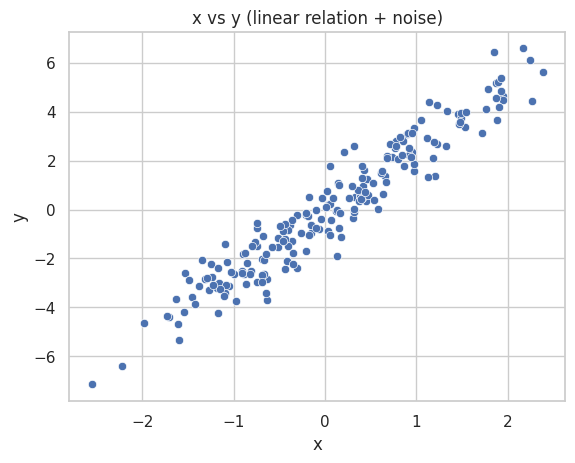

In [2]:
np.random.seed(0)
x = np.random.normal(0, 1, 200)
y = 2.5 * x + np.random.normal(0, 0.8, size=len(x))
df1 = pd.DataFrame({'x': x, 'y': y})
print(df1.head())
print('Correlation (Pearson):', df1['x'].corr(df1['y']))
sns.scatterplot(data=df1, x='x', y='y')
plt.title('x vs y (linear relation + noise)')
plt.show()

## Example 2 — Spurious correlation via confounder
We construct `a` and `b` that are both influenced by `c` (a confounder). `a` and `b` will correlate although `a` does not cause `b`.

          a         b         c
0  3.469410 -3.785173  1.624345
1 -1.653213  1.471092 -0.611756
2 -1.207344  0.580312 -0.528172
3 -2.049742  1.886864 -1.072969
4  1.158563 -2.461517  0.865408
Corr a vs b: -0.9141721380058153


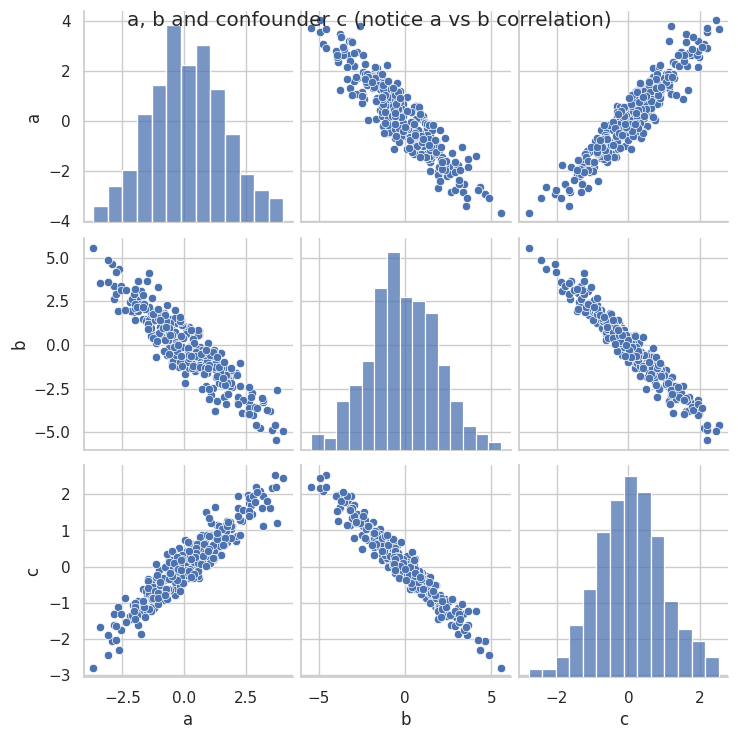

In [3]:
np.random.seed(1)
c = np.random.normal(0, 1, 300)  # confounder
a = 1.5 * c + np.random.normal(0, 0.5, size=len(c))
b = -2.0 * c + np.random.normal(0, 0.5, size=len(c))
df2 = pd.DataFrame({'a': a, 'b': b, 'c': c})
print(df2[['a','b','c']].head())
print('Corr a vs b:', df2['a'].corr(df2['b']))
sns.pairplot(df2[['a','b','c']])
plt.suptitle('a, b and confounder c (notice a vs b correlation)')
plt.show()

### Controlling for the confounder
A simple way is to use partial correlation or regress out the confounder. We'll show residuals after regressing out `c`.

Corr of residuals (a~c) vs (b~c): -0.06964132423140332


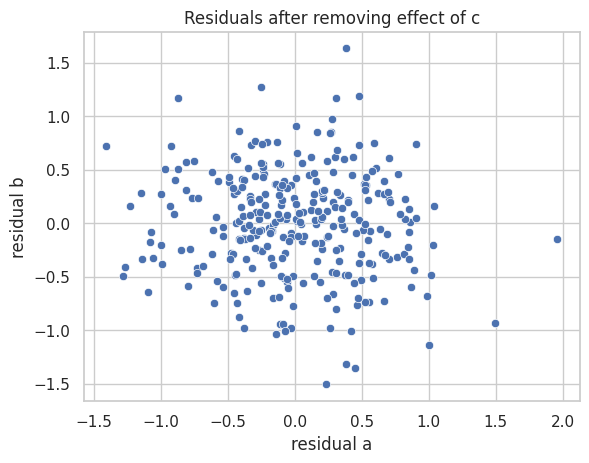

In [4]:
import statsmodels.api as sm
# regress a on c and b on c, keep residuals
model_a = sm.OLS(df2['a'], sm.add_constant(df2['c'])).fit()
model_b = sm.OLS(df2['b'], sm.add_constant(df2['c'])).fit()
res_a = model_a.resid
res_b = model_b.resid
print('Corr of residuals (a~c) vs (b~c):', res_a.corr(res_b))
sns.scatterplot(x=res_a, y=res_b)
plt.title('Residuals after removing effect of c')
plt.xlabel('residual a')
plt.ylabel('residual b')
plt.show()

## Key takeaways
- Correlation quantifies linear association but does not imply causation.
- Confounders can create spurious correlations.
- Use domain knowledge and causal methods (experiments, instrumental variables, causal graphs) when making causal claims.